In [38]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# Import Packages
import re
from pprint import pprint
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# NLTK Stop words
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
#stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [3]:
#load document 2018
text1 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-1.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text2 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-2.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text3 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-3.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text4 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-4.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text5 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-5.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text6 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-6.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text7 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-7.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text8 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-8.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text9 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-9.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text10 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-10.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text11 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-11.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text12 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-12.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text13 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-13.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text14 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-14.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text15 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-15.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text16 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-16.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text17 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-17.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text18 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-18.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text19 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-19.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text20 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-20.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text21 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-21.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text22 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-22.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text23 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-23.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text24 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-24.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text25 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-25.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text26 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-26.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text27 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-27.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text28 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-28.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text29 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-29.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text30 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-30.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text31 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-31.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text32 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-32.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text33 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-33.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text34 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-34.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text35 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-35.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text36 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-36.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text37 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-37.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text38 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-38.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text39 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-39.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text40 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-40.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text41 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-41.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text42 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-42.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text43 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-43.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text44 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-44.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text45 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-45.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text46 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-46.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text47 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-47.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text48 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-48.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text49 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-49.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text50 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-50.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text51 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-51.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text52 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-52.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text53 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-53.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text54 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-54.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text55 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-55.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text56 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-56.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text57 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-57.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text58 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-58.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text59 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-59.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text60 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-60.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text61 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-61.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text62 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-62.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text63 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-63.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text64 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-64.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text65 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-65.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text66 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-66.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text67 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-67.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text68 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-68.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text69 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-69.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text70 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-70.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text71 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-71.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text72 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-72.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text73 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-73.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text74 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-74.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text75 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-75.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text76 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-76.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text77 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-77.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text78 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-78.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text79 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-79.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text80 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-80.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text81 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-81.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text82 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-82.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text83 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-83.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text84 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-84.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text85 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-85.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text86 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-86.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text87 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-87.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text88 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-88.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text89 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-89.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text90 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-90.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text91 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-91.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text92 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-92.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text93 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-93.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text94 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-94.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text95 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-95.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text96 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-96.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text97 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-97.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text98 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-98.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text99 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-99.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text100 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-100.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容

In [4]:
#load document 2019
text101 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-1.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text102 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-2.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text103 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-3.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text104 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-4.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text105 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-5.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text106 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-6.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text107 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-7.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text108 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-8.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text109 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-9.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text110 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-10.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text111 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-11.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text112 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-12.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text113 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-13.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text114 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-14.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text115 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-15.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text116 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-16.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text117 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-17.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text118 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-18.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text119 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-19.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text120 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-20.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text121 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-21.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text122 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-22.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text123 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-23.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text124 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-24.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text125 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-25.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text126 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-26.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text127 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-27.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text128 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-28.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text129 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-29.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text130 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-30.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text131 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-31.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text132 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-32.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text133 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-33.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text134 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-34.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text135 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-35.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text136 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-36.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text137 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-37.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text138 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-38.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text139 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-39.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text140 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-40.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text141 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-41.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text142 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-42.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text143 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-43.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text144 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-44.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text145 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-45.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text146 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-46.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text147 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-47.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text148 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-48.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text149 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-49.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text150 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-50.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text151 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-51.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text152 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-52.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text153 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-53.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text154 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-54.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text155 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-55.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text156 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-56.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text157 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-57.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text158 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-58.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text159 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-59.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text160 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-60.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text161 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-61.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text162 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-62.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text163 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-63.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text164 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-64.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text165 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-65.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text166 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-66.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text167 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-67.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text168 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-68.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text169 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-69.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text170 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-70.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text171 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-71.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text172 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-72.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text173 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-73.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text174 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-74.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text175 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-75.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text176 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-76.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text177 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-77.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text178 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-78.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text179 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-79.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text180 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-80.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text181 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-81.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text182 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-82.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text183 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-83.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text184 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-84.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text185 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-85.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text186 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-86.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text187 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-87.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text188 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-88.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text189 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-89.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text190 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-90.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text191 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-91.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text192 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-92.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text193 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-93.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text194 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-94.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text195 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-95.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text196 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-96.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text197 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-97.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text198 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-98.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text199 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-99.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text200 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-100.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容

In [5]:
doc_set = [text1, text2, text3,text4,text5,text6,text7,text8,text9,text10,
             text11,text12,text13,text14,text15,text16,text17,text18,text19,text20,
             text21,text22,text23,text24,text25,text26,text27,text28,text29,text30,
             text31,text32,text33,text34,text35,text36,text37,text38,text39,text40,
             text41,text42,text43,text44,text45,text46,text47,text48,text49,text50,
             text51,text52,text53,text54,text55,text56,text57,text58,text59,text60,
             text61,text62,text63,text64,text65,text66,text67,text68,text69,text70,
             text71,text72,text73,text74,text75,text76,text77,text78,text79,text80,
             text81,text82,text83,text84,text85,text86,text87,text88,text89,text90,
             text91,text92,text93,text94,text95,text96,text97,text98,text99,text100,
           text101, text102, text103, text104, text105, text106, text107, text108, text109, text110,
           text111, text112, text113, text114, text115, text116, text117, text118, text119, text120,
           text121, text122, text123, text124, text125, text126, text127, text128, text129, text130,
           text131, text132, text133, text134, text135, text136, text137, text138, text139, text140,
           text141, text142, text143, text144, text145, text146, text147, text148, text149, text150,
           text151, text152, text153, text154, text155, text156, text157, text158, text159, text160,
           text161, text162, text163, text164, text165, text166, text167, text168, text169, text170,
           text171, text172, text173, text174, text175, text176, text177, text178, text179, text180,
           text181, text182, text183, text184, text185, text186, text187, text188, text189, text190,
           text191, text192, text193, text194, text195, text196, text197, text198, text199, text200
           ]

In [6]:
#Remove emails and newline characters
# Convert to list
data = doc_set

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['End to End Onboarding Our vision for digital onboarding spans far beyond '
 'forms and signatures. The fully integrated Agreement Express platform '
 'operates seamlessly to improve client experience and drive process '
 'optimization across multiple lines of business. Each Stage of the Lifecycle '
 'Agreement Express facilitates a client-centric focus at each stage of the '
 'lifecycle to secure a competitive advantage. Offer your customers an '
 'unbeatable front-end experience for their digital application and same-day '
 'approvals. Optimize mid- and back-office processes and improve operational '
 'excellence with custom forms and workflows for your business. Once client '
 'data has been captured through Agreement Express, it’s stored and available '
 'for re-use. Each department involved in onboarding a customer is linked with '
 'Agreement Express through any device connected to the internet. '
 'Interdependent Onboarding Processes Visibility at a Glance From a single '
 'vie

 'engagement. In addition to reducing friction in the client experience, this '
 'capability strengthens your organization’s compliance controls by '
 'eliminating dependence on untracked email communication. Whitelisting email '
 'domains for access security Keep your access settings secure and up-to-date. '
 'Company Administrators can add whitelisted email domains to an authorized '
 'list, preventing unauthorized access. This security measure helps maintain '
 'long-term consistency in administration during staff turnover. You can, for '
 'instance avoid generic email domains in order to keep your inclusion list '
 'clean and manageable. Search transaction ID Your handy search bar allows you '
 'to search for clients, users, transaction types and tags, saving valuable '
 'time in your workday. Now you can search for a transaction by its particular '
 'ID. Unleash your processing volume potential Innovators in the acquiring '
 'industry like you aim to get more merchants and earn mo

 'immediately identify the “junk” leads so you only spend time on those who '
 'are likely to get approved. QuickScore gives you a jumpstart to get '
 'approvals back in minutes, achieve faster time to revenue, and accelerate '
 'your e-commerce channels. Are you an Authorize.net reseller? Authorize.net '
 'is the first gateway provider to integrate with QuickScore. They can '
 'automatically receive incoming merchant applications from their resellers '
 'and make faster approval decisions. Let us know if you’re interested in '
 'QuickScore.']


In [7]:
#Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])

[['end', 'to', 'end', 'onboarding', 'our', 'vision', 'for', 'digital', 'onboarding', 'spans', 'far', 'beyond', 'forms', 'and', 'signatures', 'the', 'fully', 'integrated', 'agreement', 'express', 'platform', 'operates', 'seamlessly', 'to', 'improve', 'client', 'experience', 'and', 'drive', 'process', 'optimization', 'across', 'multiple', 'lines', 'of', 'business', 'each', 'stage', 'of', 'the', 'lifecycle', 'agreement', 'express', 'facilitates', 'client', 'centric', 'focus', 'at', 'each', 'stage', 'of', 'the', 'lifecycle', 'to', 'secure', 'competitive', 'advantage', 'offer', 'your', 'customers', 'an', 'unbeatable', 'front', 'end', 'experience', 'for', 'their', 'digital', 'application', 'and', 'same', 'day', 'approvals', 'optimize', 'mid', 'and', 'back', 'office', 'processes', 'and', 'improve', 'operational', 'excellence', 'with', 'custom', 'forms', 'and', 'workflows', 'for', 'your', 'business', 'once', 'client', 'data', 'has', 'been', 'captured', 'through', 'agreement', 'express', 'it', 

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['end', 'to', 'end', 'onboarding', 'our', 'vision', 'for', 'digital', 'onboarding', 'spans', 'far', 'beyond', 'forms', 'and', 'signatures', 'the', 'fully', 'integrated', 'agreement_express', 'platform', 'operates', 'seamlessly', 'to', 'improve', 'client', 'experience', 'and', 'drive', 'process', 'optimization', 'across', 'multiple', 'lines', 'of', 'business', 'each', 'stage', 'of', 'the', 'lifecycle', 'agreement_express', 'facilitates', 'client', 'centric', 'focus', 'at', 'each', 'stage', 'of', 'the', 'lifecycle', 'to', 'secure', 'competitive_advantage', 'offer', 'your', 'customers', 'an', 'unbeatable', 'front', 'end', 'experience', 'for', 'their', 'digital', 'application', 'and', 'same', 'day', 'approvals', 'optimize', 'mid', 'and', 'back_office', 'processes', 'and', 'improve', 'operational_excellence', 'with', 'custom', 'forms', 'and', 'workflows', 'for', 'your', 'business', 'once', 'client', 'data', 'has_been', 'captured', 'through', 'agreement_express', 'it', 'stored', 'and', 'avai

In [9]:
# Remove Stopwords, Make Bigrams and Lemmatize
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['end', 'end', 'onboarde', 'vision', 'digital', 'onboarde', 'span', 'far', 'form', 'signature', 'fully', 'integrate', 'agreement_express', 'platform', 'operate', 'seamlessly', 'improve', 'client', 'experience', 'drive', 'process', 'optimization', 'multiple', 'line', 'business', 'stage', 'lifecycle', 'agreement_express', 'facilitate', 'client', 'centric', 'focus', 'stage', 'lifecycle', 'secure', 'competitive_advantage', 'offer', 'customer', 'unbeatable', 'front', 'end', 'experience', 'digital', 'application', 'day', 'approval', 'optimize', 'mid', 'back_office', 'process', 'improve', 'operational_excellence', 'custom', 'form', 'workflow', 'business', 'client', 'datum', 'capture', 'agreement_express', 'store', 'available', 'department', 'involve', 'onboarde', 'customer', 'link', 'agreement_express', 'device', 'connect', 'internet', 'interdependent', 'onboarding', 'process', 'visibility', 'glance', 'single', 'view', 'call', 'workspace', 'team', 'quickly', 'review', 'take', 'action', 'item

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 3), (3, 2), (4, 1), (5, 1), (6, 8), (7, 1), (8, 6), (9, 1), (10, 8), (11, 1), (12, 4), (13, 1), (14, 1), (15, 1), (16, 2), (17, 7), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 2), (26, 1), (27, 3), (28, 19), (29, 1), (30, 1), (31, 8), (32, 3), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 11), (40, 5), (41, 1), (42, 13), (43, 5), (44, 1), (45, 4), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 3), (54, 12), (55, 1), (56, 1), (57, 2), (58, 2), (59, 2), (60, 2), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 3), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 10), (73, 14), (74, 2), (75, 1), (76, 1), (77, 6), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 7), (84, 1), (85, 1), (86, 1), (87, 2), (88, 14), (89, 2), (90, 1), (91, 2), (92, 1), (93, 2), (94, 1), (95, 4), (96, 2), (97, 2), (98, 1), (99, 4), (100, 1), (101, 1), (102, 4), (103, 1), (104, 2), (105, 1), (106, 10), (107, 1), (108, 1), (109, 1), 

In [13]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abandonment', 1),
  ('able', 1),
  ('accelerate', 3),
  ('accept', 2),
  ('acceptability', 1),
  ('acceptance', 1),
  ('access', 8),
  ('account', 1),
  ('achieve', 6),
  ('acquire', 1),
  ('acquirer', 8),
  ('acquisition', 1),
  ('action', 4),
  ('activate', 1),
  ('activity', 1),
  ('actual', 1),
  ('adapt', 2),
  ('add', 7),
  ('addition', 1),
  ('additional', 3),
  ('administration', 1),
  ('administrator', 1),
  ('adoption', 1),
  ('advantage', 1),
  ('aggregate', 2),
  ('agile', 2),
  ('agility', 1),
  ('agreement', 3),
  ('agreement_express', 19),
  ('aim', 1),
  ('align', 1),
  ('allow', 8),
  ('also', 3),
  ('always', 2),
  ('aml', 2),
  ('analysis', 1),
  ('analytic', 1),
  ('appearance', 1),
  ('applicable', 1),
  ('application', 11),
  ('apply', 5),
  ('appropriate', 1),
  ('approval', 13),
  ('approve', 5),
  ('assess', 1),
  ('assessment', 4),
  ('assign', 2),
  ('associate', 1),
  ('attachment', 1),
  ('attempt', 1),
  ('attention', 1),
  ('attract', 1),
  ('audit_tr

In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            num_topics=32,
                                            id2word=id2word,
                                            random_state=100,
                                            update_every=0,
                                            chunksize=1000,
                                            iterations=100,
                                            passes=50,
                                            alpha=0.1,
                                            per_word_topics=True)

In [15]:
# Print the keyword in the 10 topics
pprint(lda_model.print_topics(num_topics=32, num_words=10))

[(0,
  '0.016*"firm" + 0.014*"regulator" + 0.013*"service" + 0.013*"management" + '
  '0.012*"vat" + 0.011*"report" + 0.011*"control" + 0.011*"aml" + '
  '0.010*"governance" + 0.010*"business"'),
 (1,
  '0.026*"compliance" + 0.021*"regulatory" + 0.014*"datum" + 0.013*"solution" '
  '+ 0.012*"process" + 0.012*"client" + 0.012*"regulation" + 0.012*"rule" + '
  '0.010*"risk" + 0.009*"financial_institution"'),
 (2,
  '0.052*"compliance" + 0.024*"tool" + 0.021*"viclarity" + 0.019*"service" + '
  '0.019*"logo_financial" + 0.013*"monitor" + 0.012*"organisation" + '
  '0.010*"business" + 0.009*"process" + 0.009*"use"'),
 (3,
  '0.029*"risk" + 0.021*"management" + 0.021*"compliance" + 0.015*"control" + '
  '0.010*"process" + 0.010*"policy" + 0.010*"security" + 0.010*"business" + '
  '0.009*"enable" + 0.009*"time"'),
 (4,
  '0.022*"datum" + 0.013*"technology" + 0.012*"time" + 0.011*"customer" + '
  '0.011*"risk" + 0.010*"insight" + 0.010*"entity" + 0.009*"network" + '
  '0.008*"business" + 0.008

In [16]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.16823893077832

Coherence Score:  0.36925164159359625


In [17]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.088359 -0.001336       1        1  12.696325
6      0.096475 -0.041236       2        1   9.993535
3      0.132491  0.023318       3        1   9.719423
19     0.092648 -0.120565       4        1   8.300766
1      0.121878  0.038256       5        1   6.998262
23     0.078374  0.024273       6        1   4.995284
5      0.089483  0.063942       7        1   4.990522
7      0.106238  0.043136       8        1   3.758090
4      0.084575 -0.081074       9        1   3.756832
18     0.030673 -0.094189      10        1   3.711471
12     0.096597 -0.012931      11        1   3.076543
22     0.061243 -0.026566      12        1   3.068378
26     0.056723  0.087321      13        1   2.789922
17     0.085369 -0.061747      14        1   2.660813
11     0.080350  0.133098      15        1   2.499632
15     0.022770 -0.098485      16        1   2.138094
8      0.033411 -0.134985      17        1   2.063336
0      0.074417  0.108136      18        1   1.936841
20    -0.025733 -0.072354      19        1   1.880436
24    -0.022201 -0.167392      20        1   1.573547
2      0.035901  0.130047      21        1   1.329211
29     0.060116  0.137121      22        1   1.289581
28    -0.018067  0.030533      23        1   1.217437
10    -0.093124 -0.124325      24        1   0.789811
13    -0.096815  0.116774      25        1   0.662489
31    -0.136775 -0.090314      26        1   0.594091
14    -0.086627  0.043918      27        1   0.516775
21    -0.185387 -0.067352      28        1   0.352215
25    -0.196365 -0.032545      29        1   0.351873
30    -0.150585  0.142514      30        1   0.196949
16    -0.244888  0.022376      31        1   0.079856
27    -0.271524  0.082633      32        1   0.011652, topic_info=     Category         Freq           Term        Total  loglift  logprob
443   Default   988.000000     regulatory   988.000000  30.0000  30.0000
922   Default   964.000000         report   964.000000  29.0000  29.0000
106   Default  2040.000000     compliance  2040.000000  28.0000  28.0000
129   Default  2268.000000          datum  2268.000000  27.0000  27.0000
146   Default   621.000000       document   621.000000  26.0000  26.0000
465   Default  2462.000000           risk  2462.000000  25.0000  25.0000
126   Default  1227.000000       customer  1227.000000  24.0000  24.0000
1003  Default   437.000000          fraud   437.000000  23.0000  23.0000
412   Default  1166.000000        process  1166.000000  22.0000  22.0000
494   Default   918.000000        service   918.000000  21.0000  21.0000
510   Default  1152.000000       solution  1152.000000  20.0000  20.0000
98    Default   701.000000        company   701.000000  19.0000  19.0000
686   Default   486.000000           firm   486.000000  18.0000  18.0000
142   Default   341.000000        digital   341.000000  17.0000  17.0000
253   Default   438.000000       identity   438.000000  16.0000  16.0000
562   Default   470.000000    transaction   470.000000  15.0000  15.0000
305   Default   494.000000            kyc   494.000000  14.0000  14.0000
485   Default   582.000000       security   582.000000  13.0000  13.0000
88    Default   879.000000         client   879.000000  12.0000  12.0000
584   Default   667.000000           user   667.000000  11.0000  11.0000
552   Default  1129.000000           time  1129.000000  10.0000  10.0000
1245  Default   316.000000          trade   316.000000   9.0000   9.0000
461   Default   470.000000         review   470.000000   8.0000   8.0000
268   Default   808.000000    information   808.000000   7.0000   7.0000
115   Default   662.000000        control   662.000000   6.0000   6.0000
162   Default   196.000000          email   196.000000   5.0000   5.0000
1058  Default   401.000000   verification   401.000000   4.0000   4.0000
77    Default   241.000000        capture   241.000000   3.0000   3.0000
73  

In [27]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os 
os.environ.update({'MALLET_HOME':r'C:/Users/IDEA3C/Dropbox/Paper/論文/論文正式版/資料/Python程式碼/mallet-2.0.8/'})
mallet_path = 'C:/Users/IDEA3C/Dropbox/Paper/論文/論文正式版/資料/Python程式碼/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=32, id2word=id2word)

In [26]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('report', 0.03423328039527087),
   ('risk', 0.027174872066349037),
   ('fund', 0.023998588318334214),
   ('include', 0.019763543320981118),
   ('provide', 0.018528321863419798),
   ('aqmetric', 0.015881418740074114),
   ('reporting', 0.014646197282512794),
   ('monitoring', 0.014293276866066702),
   ('investment', 0.01394035644962061),
   ('asset', 0.012175754367390153)]),
 (4,
  [('datum', 0.03221504052528983),
   ('risk', 0.01631271160357033),
   ('insight', 0.015491946239868678),
   ('time', 0.013132245819226429),
   ('entity', 0.012106289114599364),
   ('result', 0.012106289114599364),
   ('search', 0.012003693444136657),
   ('source', 0.01190109777367395),
   ('technology', 0.01159331076228583),
   ('drive', 0.01077254539858418)]),
 (12,
  [('security', 0.03520154610712314),
   ('datum', 0.02995582551076753),
   ('cloud', 0.022915516289342904),
   ('user', 0.02139701822197681),
   ('activity', 0.014632799558255107),
   ('access', 0.013114301490889012),
   ('time', 0.01214

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=80, step=6)

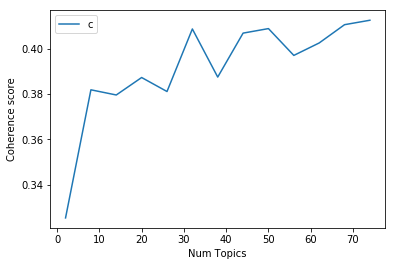

In [32]:
# Show graph
limit=80; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3253
Num Topics = 8  has Coherence Value of 0.3819
Num Topics = 14  has Coherence Value of 0.3796
Num Topics = 20  has Coherence Value of 0.3873
Num Topics = 26  has Coherence Value of 0.3811
Num Topics = 32  has Coherence Value of 0.4087
Num Topics = 38  has Coherence Value of 0.3875
Num Topics = 44  has Coherence Value of 0.4069
Num Topics = 50  has Coherence Value of 0.4089
Num Topics = 56  has Coherence Value of 0.397
Num Topics = 62  has Coherence Value of 0.4025
Num Topics = 68  has Coherence Value of 0.4106
Num Topics = 74  has Coherence Value of 0.4125


In [34]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.015*"time" + 0.015*"technology" + 0.014*"video" + 0.013*"ai" + '
  '0.013*"voice" + 0.012*"call" + 0.011*"solution" + 0.010*"provide" + '
  '0.010*"insight" + 0.010*"team"'),
 (1,
  '0.061*"regulatory" + 0.040*"risk" + 0.018*"content" + 0.018*"compliance" + '
  '0.015*"relevant" + 0.015*"datum" + 0.015*"control" + 0.014*"change" + '
  '0.013*"provide" + 0.012*"firm"'),
 (2,
  '0.042*"compliance" + 0.035*"client" + 0.025*"regulatory" + '
  '0.021*"regulation" + 0.019*"process" + 0.018*"kyc" + '
  '0.015*"financial_institution" + 0.015*"solution" + 0.015*"automate" + '
  '0.015*"rule"'),
 (3,
  '0.042*"risk" + 0.023*"customer" + 0.015*"screen" + 0.015*"identity" + '
  '0.014*"transaction" + 0.013*"user" + 0.012*"sanction" + 0.011*"time" + '
  '0.010*"base" + 0.010*"solution"'),
 (4,
  '0.046*"compliance" + 0.025*"service" + 0.024*"review" + 0.021*"firm" + '
  '0.020*"risk" + 0.016*"program" + 0.014*"provide" + 0.014*"regulatory" + '
  '0.013*"management" + 0.012*"design"'),
 (5

In [39]:
#  Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.3033,"digital, record, process, electronic, time, se...",End to End Onboarding Our vision for digital o...
1,1,15.0,0.3213,"risk, market, datum, model, portfolio, order, ...",Generating Alpha Financial firms typically imp...
2,2,19.0,0.3556,"risk, compliance, management, control, process...","Digitalise your Cyber Security, Risk Managemen..."
3,3,18.0,0.2802,"solution, fraud, security, user, company, auth...",EXPENSE REPORT AUDIT Real-time audit of expens...
4,4,10.0,0.8529,"report, risk, fund, include, provide, reportin...",Risk Analytics and Insights AQMetrics powerful...
5,5,1.0,0.3914,"regulatory, risk, content, compliance, relevan...","KYC AND ONBOARDING Build, Enrich and Maintain ..."
6,6,1.0,0.2039,"regulatory, risk, content, compliance, relevan...",Regulation AI helps you manage all your regula...
7,7,18.0,0.8930,"solution, fraud, security, user, company, auth...",BehavioSec Behavioral Biometrics software plat...
8,8,13.0,0.5188,"security, user, cloud, datum, time, business, ...",BUSINESS CONTINUITY BIGcontrols is a world cla...
9,9,2.0,0.2607,"compliance, client, regulatory, regulation, pr...",Compliance. Change. Collaboratio​n. For financ...


In [40]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5097,"time, technology, video, ai, voice, call, solu...",Automate your workflow Dashboard gives you ins...
1,1.0,0.8133,"regulatory, risk, content, compliance, relevan...",REGULATORY TAXONOMY FOR RELEVANT INFORMATION C...
2,2.0,0.8914,"compliance, client, regulatory, regulation, pr...","Global KYC, AML & Tax Engine Fenergo Regulator..."
3,3.0,0.7454,"risk, customer, screen, identity, transaction,...",IdentityMind 2.0 offers next-gen anti-money la...
4,4.0,0.6560,"compliance, service, review, firm, risk, progr...",ACA’s Comprehensive C3 Solution® provides a ra...


In [41]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,6.0,"digital, record, process, electronic, time, se...",13.0,0.065
1,15.0,"risk, market, datum, model, portfolio, order, ...",12.0,0.060
2,19.0,"risk, compliance, management, control, process...",15.0,0.075
3,18.0,"solution, fraud, security, user, company, auth...",8.0,0.040
4,10.0,"report, risk, fund, include, provide, reportin...",4.0,0.020
5,1.0,"regulatory, risk, content, compliance, relevan...",2.0,0.010
6,1.0,"regulatory, risk, content, compliance, relevan...",14.0,0.070
7,18.0,"solution, fraud, security, user, company, auth...",12.0,0.060
8,13.0,"security, user, cloud, datum, time, business, ...",14.0,0.070
9,2.0,"compliance, client, regulatory, regulation, pr...",9.0,0.045
